# Model Building

## Attaching Resources

### Importing Necessary Libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import pickle

from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 3750x2000 with 0 Axes>

### Adding Dataset

In [10]:
x = pd.read_csv(r'C:\Users\Kunal\Documents\GitHub\Energy_Production\Feature Engineering & Feature Extraction\x.csv')
y = pd.read_csv(r'C:\Users\Kunal\Documents\GitHub\Energy_Production\Feature Engineering & Feature Extraction\y.csv')

x

,log_temp,amb_pressure,log_rh
0,2.260721,1017.01,4.096010
1,2.488234,1019.72,4.550397
2,2.629728,1024.42,4.402932
3,2.618855,1017.89,4.370460
4,2.717340,1023.78,4.317488
...,...,...,...
9522,2.839078,1005.53,4.404522
9523,3.208017,1015.42,3.966511
9524,3.415758,1005.19,4.029628
9525,3.135494,1020.61,4.385645


## K-fold Cross Validation

In [11]:
kf = KFold(n_splits=10)

mod = [KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), LinearRegression(), Lasso(), Ridge(), ElasticNet()]

for i in range(len(mod)):
    kf_scores = cross_val_score(mod[i],x,y,cv=kf)
    print('Creating Model With ' + str(mod[i]))
    print('Testing Accuracy of are Model is : ' + str(kf_scores.mean()))
    print('Printing All Training Model Accuracy : \n' + str(kf_scores))
    print('\n')

Creating Model With KNeighborsRegressor()
Testing Accuracy of are Model is : 0.9157528903185691
Printing All Training Model Accuracy : 
[0.92069004 0.91360863 0.91012276 0.91873265 0.91385183 0.91267071
 0.92695976 0.91640033 0.921656   0.9028362 ]


Creating Model With DecisionTreeRegressor()
Testing Accuracy of are Model is : 0.8822133152573596
Printing All Training Model Accuracy : 
[0.88299865 0.87633551 0.87658703 0.88412877 0.884689   0.87910067
 0.88816193 0.87999443 0.89696747 0.87316968]


Creating Model With RandomForestRegressor()
Testing Accuracy of are Model is : 0.933804116453216
Printing All Training Model Accuracy : 
[0.9368589  0.9305167  0.92880208 0.93448757 0.9358533  0.92973925
 0.94260169 0.94004842 0.93694254 0.9221907 ]


Creating Model With LinearRegression()
Testing Accuracy of are Model is : 0.8847005624953266
Printing All Training Model Accuracy : 
[0.89808601 0.86679834 0.87145199 0.8805197  0.88528904 0.8871345
 0.89592553 0.88480407 0.89826946 0.87872698]

## Splitting The Data Into Traning and Testing Dataset

In [12]:
xtrain = x.drop(x.index[5718:6671])
xtest = x.iloc[5718:6671,:]

In [14]:
xtrain

,log_temp,amb_pressure,log_rh
0,2.260721,1017.01,4.096010
1,2.488234,1019.72,4.550397
2,2.629728,1024.42,4.402932
3,2.618855,1017.89,4.370460
4,2.717340,1023.78,4.317488
...,...,...,...
9522,2.839078,1005.53,4.404522
9523,3.208017,1015.42,3.966511
9524,3.415758,1005.19,4.029628
9525,3.135494,1020.61,4.385645


In [16]:
xtest

,log_temp,amb_pressure,log_rh
5718,2.326302,1019.73,4.407207
5719,3.116622,1013.49,4.401952
5720,3.089223,1016.72,4.284965
5721,2.228939,1022.72,4.307976
5722,3.296577,1000.48,4.475745
...,...,...,...
6666,3.030617,1010.26,4.248067
6667,2.527327,1016.08,4.233237
6668,3.369018,1011.10,3.939444
6669,2.507157,1007.75,4.522006


In [17]:
ytrain = y.drop(x.index[5718:6671]) 
ytest = y .iloc[5718:6671,:]

In [18]:
ytrain

,energy_production
0,481.30
1,465.36
2,465.48
3,467.05
4,463.58
...,...
9522,457.32
9523,446.92
9524,429.34
9525,421.57


In [19]:
ytest

,energy_production
5718,479.78
5719,443.58
5720,452.48
5721,482.55
5722,438.33
...,...
6666,455.69
6667,477.18
6668,442.58
6669,467.10


## Preparing Model From The Dataset

### Picking Model Lowest Training And Testing Difference

In [22]:
def predict(model):
    print('Creating Model With ' + str(model))
    model.fit(xtrain,ytrain)
    train_pred = model.predict(xtrain)
    print('Training Accuracy of are Model is : ' + str(round(r2_score(ytrain, train_pred),2)) + '%')

    test_pred = model.predict(xtest)
    print('Training Accuracy of are Model is : ' + str(round(r2_score(ytest, test_pred),2)) + '%')

    print('Mean Absolute Error of are Model is : ' + str(round(mean_absolute_error(ytest, test_pred), 4)))
    print('\n')

In [29]:
models = [ LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(),GradientBoostingRegressor(), Lasso(), Ridge(), ElasticNet()]

for i in range(len(models)):
    predict(models[i])

Creating Model With LinearRegression()
Training Accuracy of are Model is : 0.88%
Training Accuracy of are Model is : 0.9%
Mean Absolute Error of are Model is : 4.5012


Creating Model With KNeighborsRegressor()
Training Accuracy of are Model is : 0.94%
Training Accuracy of are Model is : 0.93%
Mean Absolute Error of are Model is : 3.6667


Creating Model With DecisionTreeRegressor()
Training Accuracy of are Model is : 1.0%
Training Accuracy of are Model is : 0.89%
Mean Absolute Error of are Model is : 4.3195


Creating Model With RandomForestRegressor()
Training Accuracy of are Model is : 0.99%
Training Accuracy of are Model is : 0.94%
Mean Absolute Error of are Model is : 3.2784


Creating Model With GradientBoostingRegressor()
Training Accuracy of are Model is : 0.94%
Training Accuracy of are Model is : 0.94%
Mean Absolute Error of are Model is : 3.4633


Creating Model With Lasso()
Training Accuracy of are Model is : 0.86%
Training Accuracy of are Model is : 0.87%
Mean Absolute Erro

### Performing Hyperparameter Tuning

#### Tuning Decision Tree Regressor

In [24]:
params = {
    'criterion' : ["squared_error", "friedman_mse", "absolute_error"],
    'max_depth' : [1,2,3,4,5,6],
    'min_samples_split' : [4,6,8,10,12],
    'max_leaf_nodes' : [8,10,12,14,16,18],
    'min_samples_leaf' : [1,2,3,4,5]
}

In [25]:
grid = GridSearchCV(DecisionTreeRegressor(),param_grid=params, n_jobs = -1)

grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [8, 10, 12, 14, 16, 18],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 6, 8, 10, 12]})

In [26]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 6,
 'max_leaf_nodes': 18,
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [27]:
predict(DecisionTreeRegressor(criterion = 'squared_error', max_depth = 6, max_leaf_nodes = 18, min_samples_leaf = 1, min_samples_split = 4))

Creating Model With DecisionTreeRegressor(max_depth=6, max_leaf_nodes=18, min_samples_split=4)
Training Accuracy of are Model is : 0.92%
Training Accuracy of are Model is : 0.92%
Mean Absolute Error of are Model is : 3.8591




#### Tuning Gradient Boosting Classifier

In [30]:
params = {
    'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'criterion' : ['friedman_mse', 'squared_error'],
    'learning_rate' : [0.1,0.2,0.3,0.4,0.5],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'n_estimators' : [1,2,3,4,5]
    }

In [33]:
grid = GridSearchCV(GradientBoostingRegressor(),param_grid=params, n_jobs=-1)
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 2, 3, 4, 5]})

In [35]:
grid.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.5,
 'loss': 'squared_error',
 'max_features': 'auto',
 'n_estimators': 5}

In [36]:
predict(GradientBoostingRegressor(criterion = 'squared_error', learning_rate = 0.5, loss = 'squared_error', max_features = 'auto', n_estimators = 5))

Creating Model With GradientBoostingRegressor(criterion='squared_error', learning_rate=0.5,
                          max_features='auto', n_estimators=5)
Training Accuracy of are Model is : 0.93%
Training Accuracy of are Model is : 0.93%
Mean Absolute Error of are Model is : 3.7278




#### Tuning Random Forest Classifier With Bagging Classifier

In [37]:
params = {  'bootstrap': [True, False],
            'max_depth': [10, 20, 30, 40, 50],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [200, 400, 600, 800, 1000]
    }

In [39]:
rf = RandomizedSearchCV(RandomForestRegressor(), param_distributions = params, n_jobs = -1)

rf.fit(xtrain,ytrain)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]})

In [42]:
rf.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [44]:
predict(RandomForestRegressor(n_estimators = 800, min_samples_split = 2, min_samples_leaf = 1, max_features = 'auto', max_depth = 10, bootstrap = True))

Creating Model With RandomForestRegressor(max_depth=10, max_features='auto', n_estimators=800)
Training Accuracy of are Model is : 0.96%
Training Accuracy of are Model is : 0.94%
Mean Absolute Error of are Model is : 3.2803




#### Tuning Logistic Regression With AdaBoost Classifier

In [45]:
predict(AdaBoostRegressor(LinearRegression()))

Creating Model With AdaBoostRegressor(estimator=LinearRegression())
Training Accuracy of are Model is : 0.88%
Training Accuracy of are Model is : 0.89%
Mean Absolute Error of are Model is : 4.7451




In [46]:
predict(BaggingRegressor(LinearRegression()))

Creating Model With BaggingRegressor(estimator=LinearRegression())
Training Accuracy of are Model is : 0.88%
Training Accuracy of are Model is : 0.9%
Mean Absolute Error of are Model is : 4.5111




#### Tuning KNeighborsClassifier With Bagging Classifier

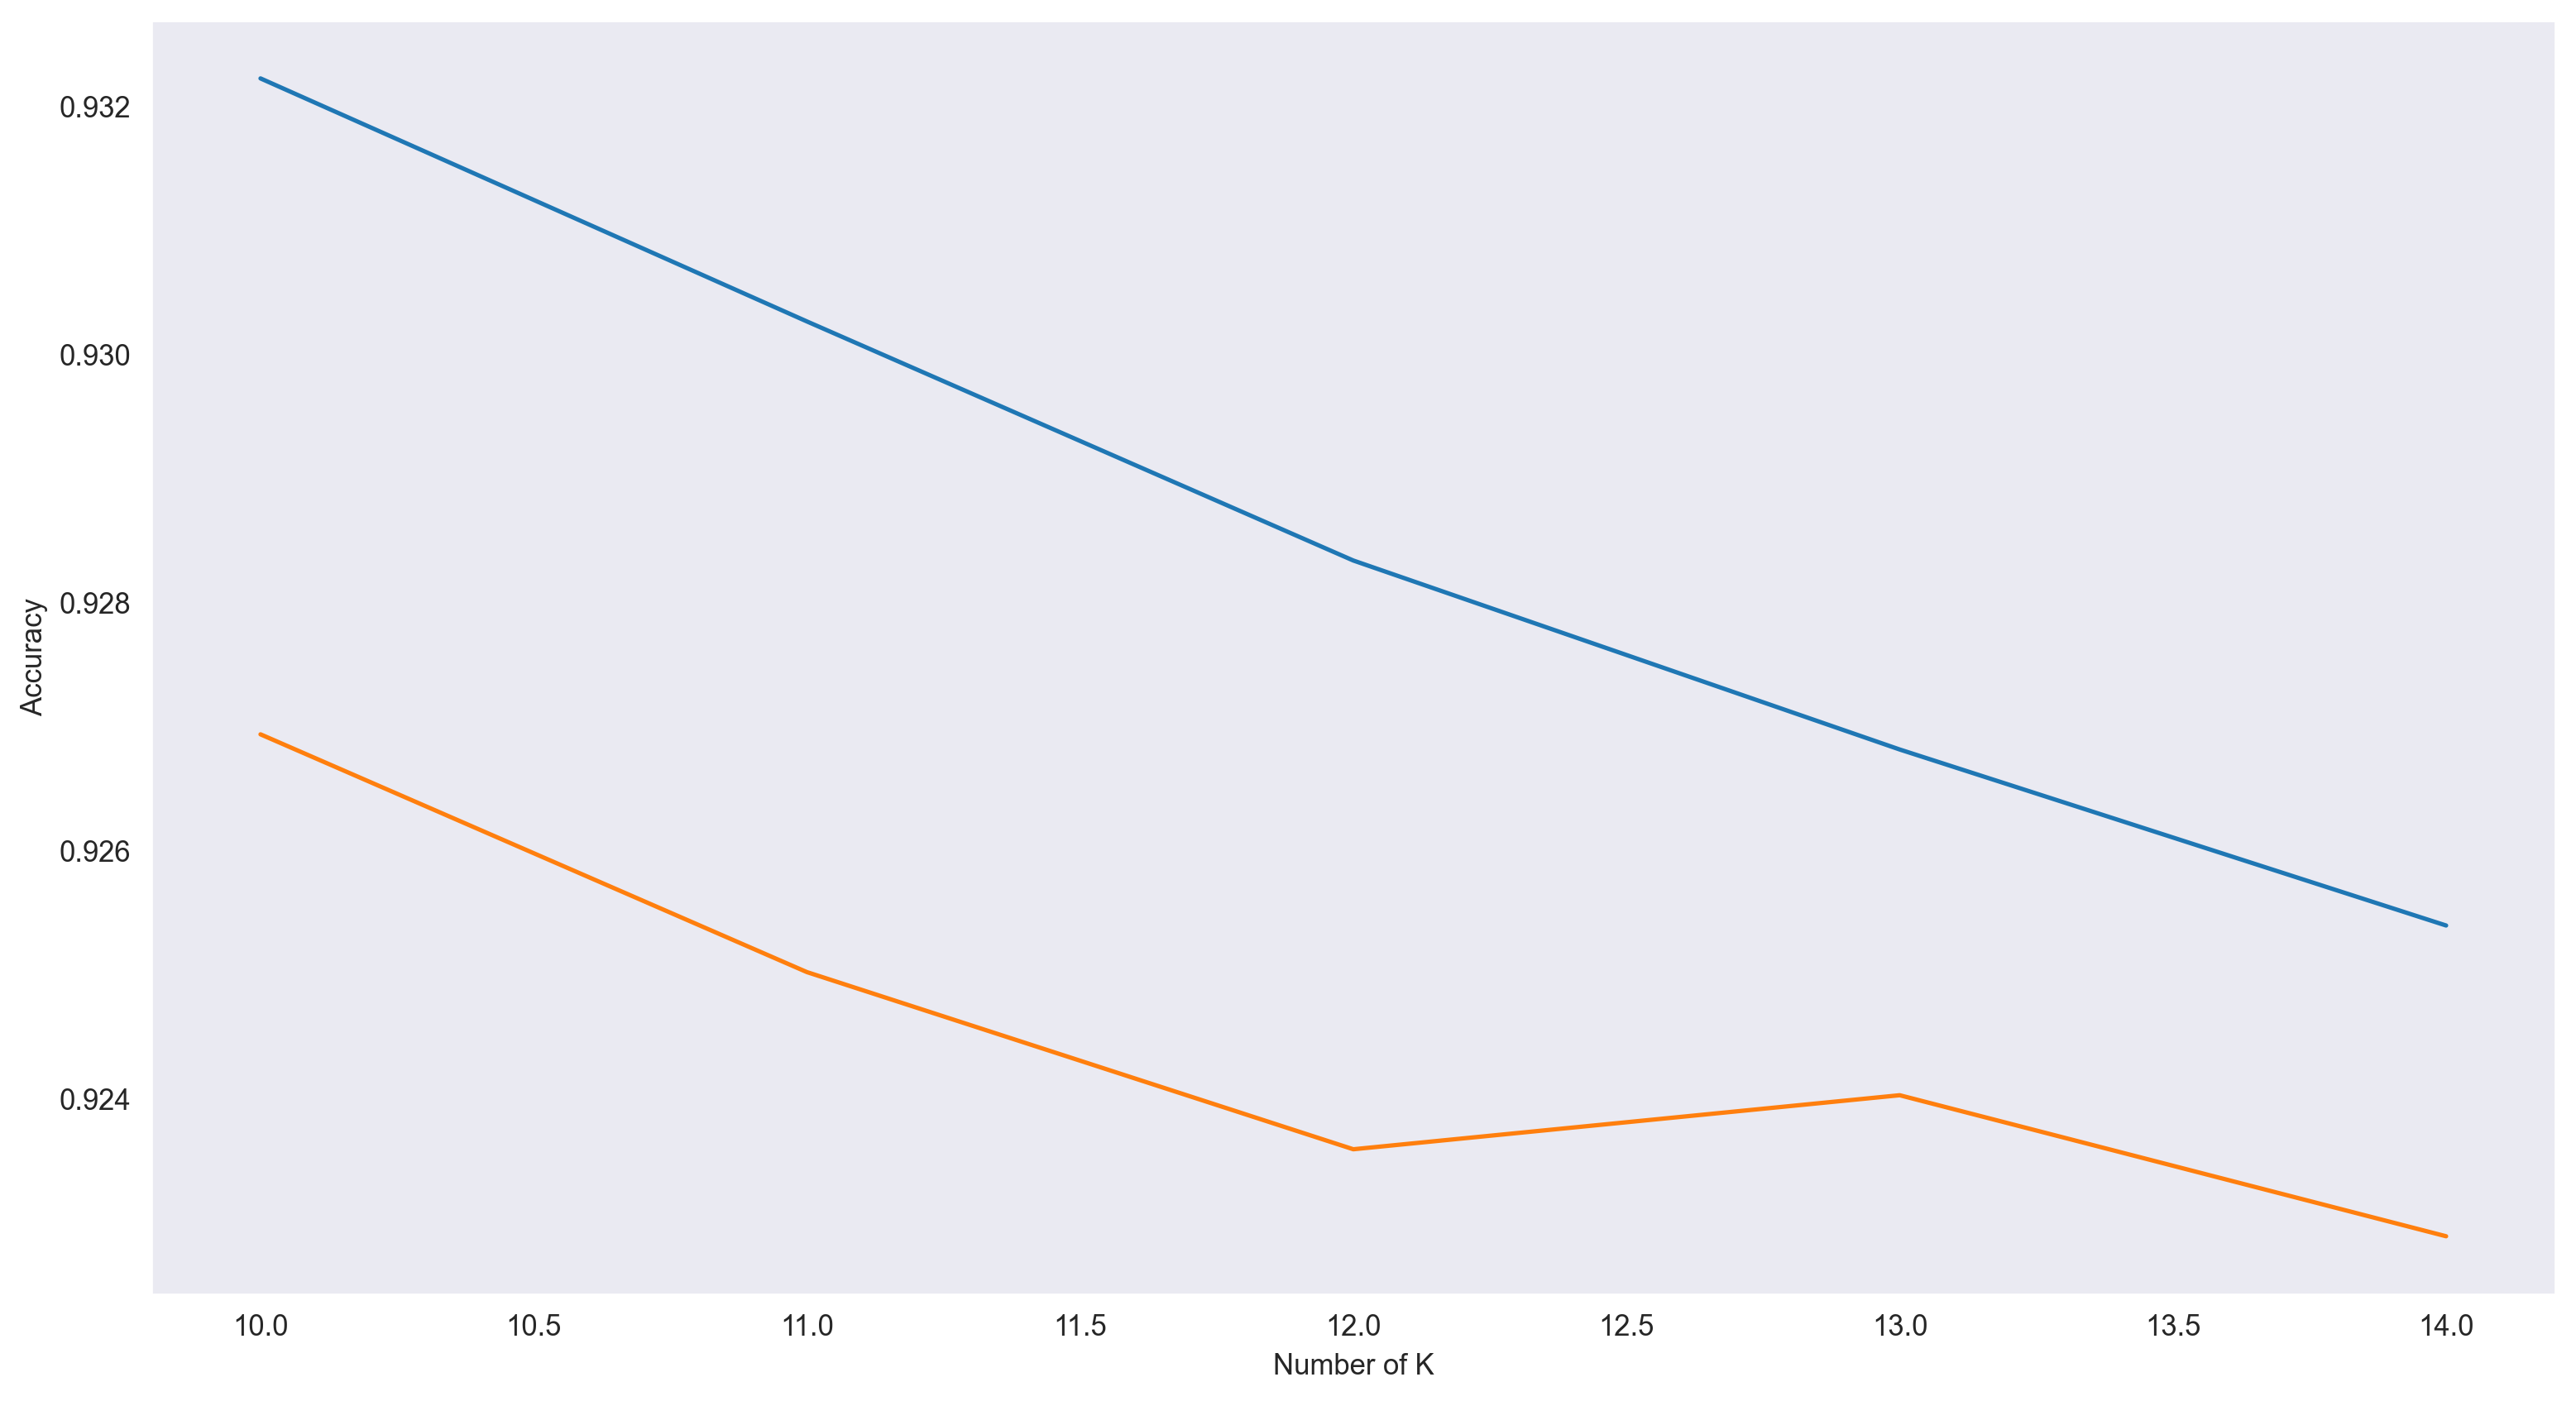

In [54]:
trainac = []
testac = []

for i in range(10,15):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)

    trainac.append(knn.score(xtrain,ytrain))
    testac.append(knn.score(xtest,ytest))

plt.title('')
plt.plot(range(10,15),trainac)
plt.plot(range(10,15), testac)
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.grid()

In [52]:
predict(KNeighborsRegressor(n_neighbors = 13))

Creating Model With KNeighborsRegressor(n_neighbors=13)
Training Accuracy of are Model is : 0.93%
Training Accuracy of are Model is : 0.92%
Mean Absolute Error of are Model is : 3.79




### Creating ANN Model

#### Creating ann_def Model

In [99]:
ann_def =Sequential()

##### Creating Hidden Layer

In [100]:
ann_def.add(Dense(units=30, activation='relu'))
ann_def.add(Dense(units=20, activation='relu'))

##### Creating Output Layer

In [101]:
ann_def.add(Dense(units=1))

##### Connecting All Neurons In Each Layer

In [102]:
ann_def.compile(optimizer='adam', loss='mse')

##### Fitting Data

In [103]:
ann_def.fit(xtrain, ytrain, validation_data = (xtest, ytest), epochs = 100)

Epoch 1/100


268/268 [==============================] - 1s 2ms/step - loss: 25379.9883 - val_loss: 277.1676
Epoch 2/100
268/268 [==============================] - 0s 2ms/step - loss: 252.6963 - val_loss: 279.8569
Epoch 3/100
268/268 [==============================] - 0s 2ms/step - loss: 252.1185 - val_loss: 282.6071
Epoch 4/100
268/268 [==============================] - 0s 2ms/step - loss: 252.1134 - val_loss: 275.9403
Epoch 5/100
268/268 [==============================] - 0s 2ms/step - loss: 252.2366 - val_loss: 275.2451
Epoch 6/100
268/268 [==============================] - 0s 2ms/step - loss: 252.0372 - val_loss: 275.2621
Epoch 7/100
268/268 [==============================] - 0s 2ms/step - loss: 250.8167 - val_loss: 282.3786
Epoch 8/100
268/268 [==============================] - 0s 2ms/step - loss: 250.8429 - val_loss: 273.2814
Epoch 9/100
268/268 [==============================] - 0s 2ms/step - loss: 250.3937 - val_loss: 283.2357
Epoch 10/100
268/268 [==============================] - 0s 2ms/st

##### Creating Report

In [127]:
ypred_test = ann_def.predict(xtest)
ypred_train = ann_def.predict(xtrain)

 1/30 [>.............................] - ETA: 1s

268/268 [==============================] - 1s 2ms/step


In [128]:
print('Training Accuracy of are Model is : ' + str(round(r2_score(ytrain, ypred_train),2)) + '%')
print('Testing Accuracy of are Model is : ' + str(round(r2_score(ytest, ypred_test),2)) + '%')
print('Mean Absolute Error of are Model is : ' + str(round(mean_absolute_error(ytest, ypred_test), 4)))

Training Accuracy of are Model is : 0.89%
Testing Accuracy of are Model is : 0.9%
Mean Absolute Error of are Model is : 4.47


### Creating ANN Model With Early Stopping And Drop Out Layer

#### Creating ann Model

In [152]:
early = EarlyStopping(monitor='val_loss',mode='min', patience=25)

In [153]:
ann_all =Sequential()

##### Creating Hidden Layer

In [154]:
ann_all.add(Dense(units=30, activation='relu'))
#ann_all.add(Dropout(rate=0.5))

ann_all.add(Dense(units=20, activation='relu'))
#ann_all.add(Dropout(rate=0.5))

##### Creating Output Layer

In [155]:
ann_all.add(Dense(units=1))

##### Connecting All Neurons In Each Layer

In [156]:
ann_all.compile(optimizer='adam', loss='mse')

##### Fitting Data

In [157]:
ann_all.fit(xtrain, ytrain, validation_data = (xtest, ytest), callbacks=[early] , epochs = 500)

Epoch 1/500


268/268 [==============================] - 2s 3ms/step - loss: 14572.4287 - val_loss: 276.9036
Epoch 2/500
268/268 [==============================] - 1s 2ms/step - loss: 250.5411 - val_loss: 273.9089
Epoch 3/500
268/268 [==============================] - 0s 2ms/step - loss: 250.7212 - val_loss: 274.4545
Epoch 4/500
268/268 [==============================] - 0s 2ms/step - loss: 249.9164 - val_loss: 276.5032
Epoch 5/500
268/268 [==============================] - 0s 2ms/step - loss: 250.0119 - val_loss: 276.8790
Epoch 6/500
268/268 [==============================] - 0s 2ms/step - loss: 249.4730 - val_loss: 272.0148
Epoch 7/500
268/268 [==============================] - 0s 2ms/step - loss: 250.7437 - val_loss: 272.6980
Epoch 8/500
268/268 [==============================] - 0s 2ms/step - loss: 250.1068 - val_loss: 272.6890
Epoch 9/500
268/268 [==============================] - 0s 2ms/step - loss: 249.8677 - val_loss: 269.7450
Epoch 10/500
268/268 [==============================] - 0s 2ms/st

- best epochs : 88 

##### Creating Report

In [158]:
ypred_test = ann_all.predict(xtest)
ypred_train = ann_all.predict(xtrain)

268/268 [==============================] - 0s 1ms/step


In [159]:
print('Training Accuracy of are Model is : ' + str(round(r2_score(ytrain, ypred_train),2)) + '%')
print('Testing Accuracy of are Model is : ' + str(round(r2_score(ytest, ypred_test),2)) + '%')
print('Mean Absolute Error of are Model is : ' + str(round(mean_absolute_error(ytest, ypred_test), 4)))

Training Accuracy of are Model is : 0.86%
Testing Accuracy of are Model is : 0.88%
Mean Absolute Error of are Model is : 5.0356


## Creating Final Model With Hyperparameter Value

#### Evaluating The Model

##### Creating Classification Report

##### Comparing Training And Testing Accuracy

## Creating Model